In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded=files.upload()

Saving book.csv to book.csv


In [3]:
# Reading the dataset
books_df=pd.read_csv("book.csv",encoding='latin')

In [4]:
# Renaming the columns
books_df=books_df.drop('Unnamed: 0',axis=1)
books_df.rename(columns={'User.ID':'UserID','Book.Title':'Book','Book.Rating':'Rating'},inplace=True)

In [5]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UserID  10000 non-null  int64 
 1   Book    10000 non-null  object
 2   Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [6]:
books_df[books_df.duplicated()]

,UserID,Book,Rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [7]:
# Dropping the duplicate values

books_df=books_df.drop_duplicates()

In [8]:
books_df.shape

(9998, 3)

In [9]:
books_df.groupby(['Book'])['Rating'].agg('mean').nlargest()

Book
01-01-00: A Novel of the Millennium                     10.0
1,401 More Things That P*Ss Me Off                      10.0
100 Great Fantasy Short, Short Stories                  10.0
1001 Brilliant Ways to Checkmate                        10.0
20,000 Leagues Under the Sea (Wordsworth Collection)    10.0
Name: Rating, dtype: float64

In [10]:
books_df.groupby(['Book'])['Rating'].agg('mean').nsmallest()

Book
A Country Courtship (Zebra Regency Romance)    1.0
A Kiss Remembered                              1.0
Adolf, Hitler                                  1.0
Aldo Applesauce                                1.0
American Gods: A Novel                         1.0
Name: Rating, dtype: float64

In [11]:
books_df.groupby(['Book'])['Rating'].agg('mean').nlargest().value_counts()

Rating
10.0    5
Name: count, dtype: int64

**There are *five* books which on an average have recieved Rating of 10**.

In [12]:
grp=books_df.groupby('Rating')
for rating,group in grp:
  print('Rating of the book is:',rating)
  print(group.iloc[:,1],'\n')

Rating of the book is: 1
115                                     A Kiss Remembered
640                                 Children of the Night
1442                                               Saucer
1717                     Catechism of the Catholic Church
2107                  Anam Cara : A Book of Celtic Wisdom
2231                                     The Selfish Gene
2294    Having Our Say: The Delany Sisters' First 100 ...
2320                The Elements of Style, Fourth Edition
2321                            How to Say It Style Guide
3900                                           Fatal Care
4129                     The Honk and Holler Opening Soon
4231                   Cars and Trucks and Things That Go
4241                               American Gods: A Novel
4337    Welcome to the Funny Farm: The All-True Misadv...
4367                                 The Door into Summer
4523                                       Selected Poems
4532                                      Time 

In [13]:
# Number of unique users in the dataset.

len(books_df.UserID.unique())

2182

> >**There are 2182 unique users in the dataset,**

In [14]:
# Number of Unique books

len(books_df.Book.unique())

9659

> >**There are 9659 unique books in the dataset.**

In [15]:
books_df.Rating.value_counts()

Rating
8     2283
7     2074
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: count, dtype: int64

> > Around close to **2300** books have recieved the **Rating** of **8**.

# *Rating Distribution*

>>>**The distribution of book's rating and count is as below.**

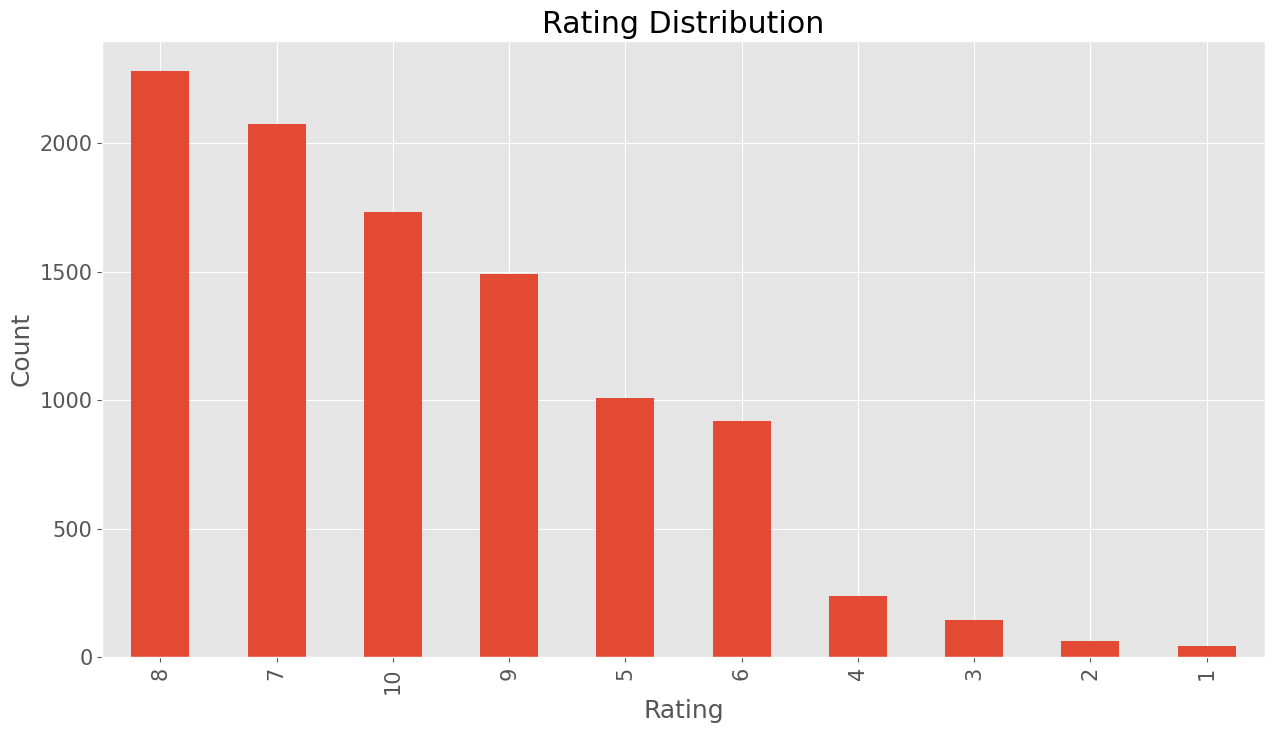

In [16]:
plt.figure(figsize=(15,8))
plt.style.use("ggplot")
plt.rc("font",size=15)
books_df.Rating.value_counts().plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.plot();

In [17]:
user_books_df=books_df.pivot_table(index='UserID',columns='Book',values='Rating').fillna(0)

In [18]:
user_books_df.shape

(2182, 9659)

In [19]:
user_books_df.iloc[0:5,0:5]

Book,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities
UserID,,,,,
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0


>> **Calculating the *cosine* similarity between the readers.**

In [20]:
# Importing required libraries for the above

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

In [21]:
user_sim=1-pairwise_distances(user_books_df.values,metric='cosine')

In [22]:
# User similarity

user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [23]:
# Storing the similarity as a DataFrame

user_sim_df=pd.DataFrame(user_sim)

In [24]:
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
# Set the index and column names to User ID's

user_sim_df.index=list(user_books_df.index)
user_sim_df.columns=list(user_books_df.index)

In [26]:
user_sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
user_sim_df.iloc[0:5,0:5]

,8,9,10,12,14
8,1.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0
14,0.0,0.0,0.0,0.0,1.0


In [28]:
# Filling the diagonal entries with 0.

np.fill_diagonal(user_sim,0)
user_sim_df.iloc[0:5,0:5]

,8,9,10,12,14
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0


In [29]:
user_sim_df.idxmax(axis=1)

8              8
9              8
10             8
12             8
14             8
           ...  
278846         8
278849         8
278851    278202
278852         8
278854         8
Length: 2182, dtype: int64

In [30]:
books_df[(books_df['UserID']==10)|(books_df['UserID']==14)]

,UserID,Book,Rating
2407,10,SINGLE &amp; SINGLE,6
2409,14,COPS,5
2410,14,A Cold Heart: An Alex Delaware Novel,5
2411,14,Dead Sleep,6


In [31]:
user_1=books_df[books_df['UserID']==10]

In [32]:
user_2=books_df[books_df['UserID']==14]

In [33]:
user_1.Book

2407    SINGLE &amp; SINGLE
Name: Book, dtype: object

In [34]:
user_2.Book

2409                                    COPS
2410    A Cold Heart: An Alex Delaware Novel
2411                              Dead Sleep
Name: Book, dtype: object

In [35]:
pd.merge(user_1,user_2,on='Book',how='outer').fillna('-')

,UserID_x,Book,Rating_x,UserID_y,Rating_y
0,10.0,SINGLE &amp; SINGLE,6.0,-,-
1,-,COPS,-,14.0,5.0
2,-,A Cold Heart: An Alex Delaware Novel,-,14.0,5.0
3,-,Dead Sleep,-,14.0,6.0


**From the above we can see that User-2 can recommend books with titles below to User-1.**

> 1. COPS

> 2. A Cold Heart: An Alex Delaware Novel

> 3. Dead Sleep
